# Introduction to Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Linear Regression

In [2]:
x=np.array([5,15,25,35,45,55]).reshape((-1,1))
y=np.array([5,20,14,32,22,38])

In [3]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [4]:
y

array([ 5, 20, 14, 32, 22, 38])

In [5]:
model=LinearRegression()

In [6]:
model.fit(x,y)

LinearRegression()

In [7]:
model.intercept_

5.633333333333329

In [8]:
model.coef_

array([0.54])

In [9]:
r_sq=model.score(x,y)
r_sq

0.715875613747954

In [10]:
new_model=LinearRegression().fit(x,y) #commands in one line
new_model.intercept_

5.633333333333329

In [11]:
a=np.array([5,15,25,35,45,55,1,2,3,4,5,6]).reshape((-1,2))
b=np.array([5,20,14,32,22,38])

In [12]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [13]:
new_model=LinearRegression().fit(a,b) #commands in one line, dengan 2 variabel x
new_model.intercept_

32.49761642830951

In [14]:
new_model.coef_

array([ 2.78144481, -2.54382105])

In [15]:
y_pred=model.predict(x) #prediksi berdasarkan input x
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

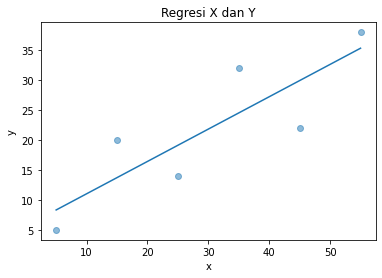

In [16]:
plt.scatter(x,y,alpha=0.5)  #scatter plot actual
plt.plot(x,y_pred) #lineplot prediksi

plt.title('Regresi X dan Y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
y_pred2=model.intercept_+model.coef_*x
y_pred2

array([[ 8.33333333],
       [13.73333333],
       [19.13333333],
       [24.53333333],
       [29.93333333],
       [35.33333333]])

## Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
x=np.array([5,15,25,35,45,55]).reshape((-1,1))
y=np.array([5,11,2,8,25,32])

In [27]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

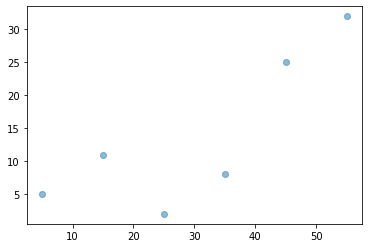

In [31]:
plt.scatter(x,y,alpha=0.5)  #scatter plot actual


In [32]:
transformer=PolynomialFeatures(degree=2, include_bias=False)

In [33]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [34]:
x_=transformer.transform(x) # x_ adalah x^2

In [35]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [36]:
model=LinearRegression(fit_intercept=False).fit(x_,y)

In [37]:
print('coefficient of determination:', model.score(x_,y))
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.7836685438314063
intercept: 0.0
coefficients: [0.04138118 0.00973122]


In [39]:
y_pred=model.predict(x_)
y_pred

array([ 0.4501864 ,  2.81024208,  7.1165416 , 13.36908496, 21.56787216,
       31.7129032 ])

## Advanced Linear Regression

In [41]:
import statsmodels.api as sm

In [42]:
x=[[0,1],[5,1],[15,2],[25,5],[35,11],[45,15],[55,34],[60,35]]
y=[4,5,20,14,32,22,38,43]
x,y=np.array(x),np.array(y)
print (x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]


In [43]:
x=sm.add_constant(x)

In [44]:
print(x)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]


In [45]:
model=sm.OLS(y,x)

In [46]:
results=model.fit()

In [47]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Wed, 17 Nov 2021   Prob (F-statistic):            0.00713
Time:                        20:47:46   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\Users\3330218\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [49]:
results.params #regression coeff

array([5.52257928, 0.44706965, 0.25502548])

In [50]:
results.rsquared

0.8615939258756777

In [51]:
results.rsquared_adj

0.8062314962259488

In [57]:
results.predict(x)

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [59]:
x_new=sm.add_constant(np.arange(10).reshape(-1,2))
print(x_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]


## Implementing Linear Regression on Real Dataset

In [60]:
import statsmodels.api as sm
from sklearn import datasets
data=datasets.load_boston()

In [61]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv", usecols=['horsepower', 'price'])